In [68]:
import numpy as np


# ref - https://www.kaggle.com/competitions/vesuvius-challenge-ink-detection/discussion/397288
def fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5):
    
    y_true_count = np.sum(y_true)
    
    ctp = np.sum(y_pred * y_true)
    cfp = np.sum(y_pred * (1 - y_true))
    # False negatives
    cfm = np.sum((1 - y_pred) * y_true)
    beta_squared = beta * beta

    c_precision = ctp / (ctp + cfp + smooth)
    c_recall = ctp / (ctp + cfm + smooth)
    fbeta = (1 + beta_squared) * (c_precision * c_recall) / (beta_squared * c_precision + c_recall + smooth)

    return fbeta

In [69]:
n_el = 1000
fbetas = []
bces = []
focals = []
for indx in range(n_el):
    y_pred = np.array([0] * (n_el-indx) + [1] * indx)
    y_true = np.array([0] * (800) + [1] * (200))

    fbeta = fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)
    fbetas.append(fbeta)
    
    # calculate bce loss
    weights = [1, 2]
    bce = -1 * (weights[1] * y_true * np.log(y_pred + 1e-5) + weights[0] * (1 - y_true) * np.log(1 - y_pred + 1e-5))
    bce = np.mean(bce)
    bces.append(-bce)
    
    # calculate the focal loss
    gamma = 2
    alpha = 0.35
    focal = -1 * (alpha * (1 - y_pred) ** gamma * y_true * np.log(y_pred + 1e-5) + (1 - alpha) * y_pred ** gamma * (1 - y_true) * np.log(1 - y_pred + 1e-5))
    focal = np.mean(-focal)
    focals.append(focal)
    

0.44544544544544545 1.3163163163163163


/tmp/ipykernel_689737/1980310074.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0.8, 0.8], 'k-', lw=1, color='red')
/tmp/ipykernel_689737/1980310074.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x[indx], x[indx]], [0, 1], 'k-', lw=1, color='red')
/tmp/ipykernel_689737/1980310074.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([x[indx_3], x[indx_3]], [0, 1], 'k-', lw=1, color='red')


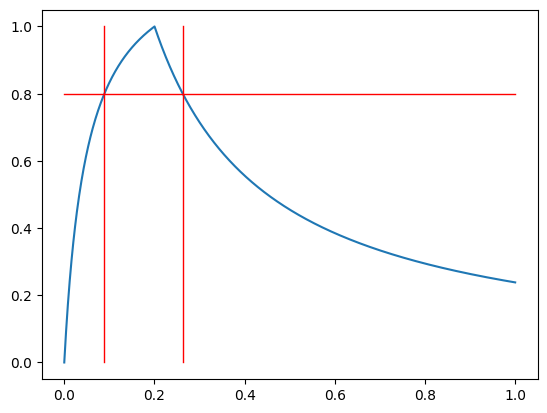

In [70]:
import matplotlib.pyplot as plt

x = np.arange(0, len(fbetas))
x = x/np.max(x)
plt.plot(x, fbetas)

# put horizontal line at 0.8
plt.plot([0, 1], [0.8, 0.8], 'k-', lw=1, color='red')

# find where fbetas=0.8
indx = np.where(np.array(fbetas) > 0.8)[0][0]
# indx_2 = np.where(np.array(fbetas) > 0.7)[0][0]
# find where fbetas=0.8 and x> 0.2
indx_3 = np.where((np.array(fbetas) < 0.8) & (x>0.2))[0][0]

# put vertical line at indx
plt.plot([x[indx], x[indx]], [0, 1], 'k-', lw=1, color='red')
# plt.plot([x[indx_2], x[indx_2]], [0, 1], 'k-', lw=1, color='red')
plt.plot([x[indx_3], x[indx_3]], [0, 1], 'k-', lw=1, color='red')

# print the value of x[indx]
print(x[indx]/0.2, x[indx_3]/0.2)

# if you predict 45% of the y_true=1 pixels, and rest of all pixels as 0, you get fbeta=0.8
# if you predict 100% of the y_true=1 pixels, but you fail 32% of the y_true=0 pixels, you get fbeta=0.8

In [71]:
y_pred = np.array([0] * (800) + [1] * 70 + [0] * 130)
y_true = np.array([0] * (800) + [1] * (200))

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.7291544381367667

In [72]:
y_pred = np.array([0] * (800) + [1] * 80 + [0] * 120)
y_true = np.array([0] * (800) + [1] * (200))

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.7692188611290212

In [73]:
y_pred = np.array([0] * (800) + [1] * 90 + [0] * 110)
y_true = np.array([0] * (800) + [1] * (200))

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.8035598773963416

In [74]:
y_pred = np.array([0] * (800) + [1] * 100 + [0] * 100)
y_true = np.array([0] * (800) + [1] * (200))

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.8333221529261149

In [75]:
y_pred = np.array([0] * (790) + [1]*10 + [1] * 80 + [0] * 120)
y_true = np.array([0] * (800) + [1] * (200))

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.714274171103064

Best case scenario: all positive pixels are correct

In [76]:
# 5% of 1000 = 50

y_pred = np.array([0] * (800) + [1] * 50 + [0] * 150)
y_true = np.array([0] * (800) + [1] * (200))

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.6249874221250049

What probably happened at the LB

In [87]:
# 5% of 1000 = 50

y_pred = np.array([0] * (800)+ [1] * 30 + [0] * 170)
y_true = np.array([0] * (800) + [1] * (200))

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.46873820829995533

Best case scenario: all positive pixels are correct

In [78]:
# 15% of 1000 = 150

y_pred = np.array([0] * (800) + [1] * 150 + [0] * 50)
y_true = np.array([0] * (800) + [1] * (200))

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.9374905665000808

What could happen at the LB if I maintain the ratio of true_positive/false_positive as before

In [83]:
# 15% of 1000 = 150

y_pred = np.array([0] * (695) + [1]*105 + [1] * 45 + [0] * 155)
y_true = np.array([0] * (800) + [1] * (200))

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.2812406077344438

In [65]:
# 15% of 1000 = 50

y_pred = np.array([0] * (770) + [1]*30 + [1] * 120 + [0] * 80)
y_true = np.array([0] * (800) + [1] * (200))

# shuffle both arrays simultaneously    
from sklearn.utils import shuffle
y_pred, y_true = shuffle(y_pred, y_true)

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.749990578242267

In [84]:
# 2% of 1000 = 20

y_pred = np.array([0] * (800) + [1] * 20 + [0] * 180)
y_true = np.array([0] * (800) + [1] * (200))

fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)

0.3571325895752947

0.8035598773963416

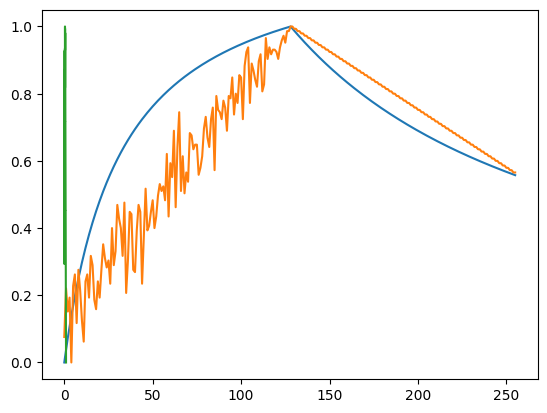

In [9]:
import matplotlib.pyplot as plt

plt.plot(fbetas)

# rescale bces to be between 0 and 1
bces = (bces - np.min(bces)) / (np.max(bces) - np.min(bces))
plt.plot(bces)


# rescale focals to be between 0 and 1
focals = (focals - np.min(focals)) / (np.max(focals) - np.min(focals))
x = np.arange(0, len(focals))
plt.plot(x, focals)

In [5]:
n_el = 256
fbetas_2 = []
bces = []
focals = []
for indx in range(n_el):
    y_pred = np.array([0] * (n_el-indx) + [1] * indx)
    y_true = np.array([0] * (n_el//2) + [1] * (n_el//2))
    
    random_indices = np.arange(0, n_el-indx)
    random_indices = np.random.choice(random_indices, size=(n_el-indx)//2, replace=False)
    y_pred[random_indices] = 1
    
    

    fbeta = fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)
    fbetas_2.append(fbeta)
    
    # calculate bce loss
    weights = [1, 2]
    bce = -1 * (weights[1] * y_true * np.log(y_pred + 1e-5) + weights[0] * (1 - y_true) * np.log(1 - y_pred + 1e-5))
    bce = np.mean(bce)
    bces.append(-bce)
    
    # calculate the focal loss
    gamma = 2
    alpha = 0.35
    focal = -1 * (alpha * (1 - y_pred) ** gamma * y_true * np.log(y_pred + 1e-5) + (1 - alpha) * y_pred ** gamma * (1 - y_true) * np.log(1 - y_pred + 1e-5))
    focal = np.mean(-focal)
    focals.append(focal)
    

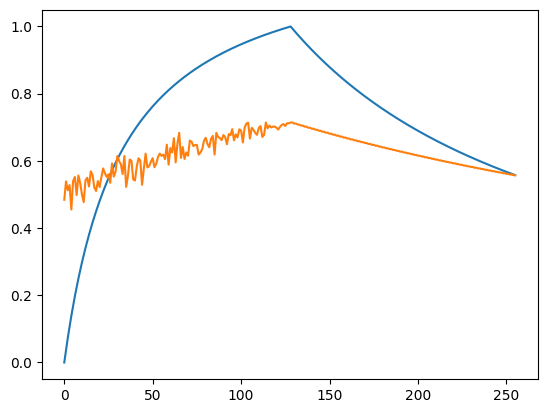

In [6]:
import matplotlib.pyplot as plt

plt.plot(fbetas)
plt.plot(fbetas_2)



In [7]:
correct = [1] * 25 + [0] * 25
y_pred = np.array([0] * 50 + correct)
y_true = np.array([0] * 25 + [1] * 25 + correct)
fbeta = fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)
fbeta

0.8333219445934241

In [8]:
correct = [1] * 25 + [0] * 25


x = np.array([0] * 50)
# put 1 and 10 random places
random_indices = np.arange(0, 50)
random_indices = np.random.choice(random_indices, size=2, replace=False)
x[random_indices] = 1


y_pred = np.concatenate([x, correct])
y_true = np.concatenate([np.array([0] * 25 + [1] * 25),  correct])
fbeta = fbeta_score(y_pred, y_true, beta=0.5, smooth=1e-5)
fbeta

0.791128174719995

OK, so fbeta values more if you have correct 0, than if you have correct 1. What loss function can simulate this?